In [2]:
# import libs 
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import cv2 
import os 

(3264, 2448, 3)

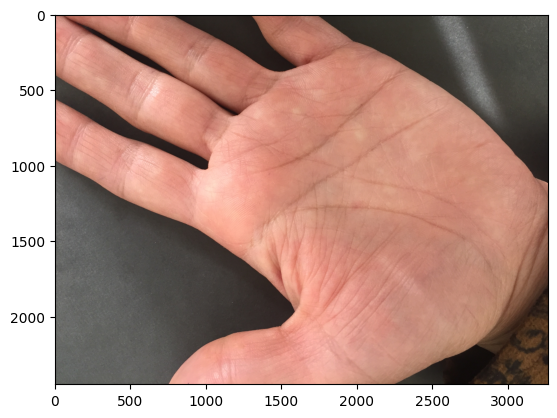

In [20]:
img = image.load_img("basedata/training/001/001_F_L_30.JPG")
plt.imshow(img)
im1 = cv2.imread("basedata/training/001/001_F_L_30.JPG")
im1.shape

In [11]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [12]:
# set directory paths 
base_dir = "basedata"
training = "training"
validationString = "validation"

# training ,validation locations 
training_path = os.path.join(base_dir,training)
validation_path = os.path.join(base_dir,validationString)

In [21]:
# obtain datasets 
train_dataset = train.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 8 , 
    class_mode = 'categorical')

validation_dataset = validation.flow_from_directory(
    validation_path,
    target_size = (200,200),
    batch_size = 3 , 
    class_mode = 'categorical')

Found 1129 images belonging to 41 classes.
Found 161 images belonging to 41 classes.


In [22]:
train_dataset.class_indices

{'001': 0,
 '002': 1,
 '003': 2,
 '004': 3,
 '005': 4,
 '006': 5,
 '007': 6,
 '008': 7,
 '009': 8,
 '010': 9,
 '011': 10,
 '012': 11,
 '013': 12,
 '014': 13,
 '015': 14,
 '016': 15,
 '017': 16,
 '018': 17,
 '019': 18,
 '020': 19,
 '021': 20,
 '022': 21,
 '023': 22,
 '024': 23,
 '025': 24,
 '026': 25,
 '027': 26,
 '028': 27,
 '029': 28,
 '030': 29,
 '031': 30,
 '032': 31,
 '033': 32,
 '034': 33,
 '035': 34,
 '036': 35,
 '037': 36,
 '038': 37,
 '039': 38,
 '040': 39,
 '041': 40}

In [23]:
train_dataset.classes

array([ 0,  0,  0, ..., 40, 40, 40], dtype=int32)

In [24]:
# define model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu" , input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),

    #
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2) , 
    #
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(512,activation = "relu"),
    #
    tf.keras.layers.Dense(1,activation="softmax")
]) 

2023-04-20 05:49:16.124264: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 69337088 exceeds 10% of free system memory.
2023-04-20 05:49:16.159455: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 69337088 exceeds 10% of free system memory.


In [25]:
model.compile(
    loss = 'binary_crossentropy' ,
    optimizer = RMSprop(lr=0.01),
    metrics = ['accuracy']
    )

In [27]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch= 3,
    epochs = 30, 
    validation_data = validation_dataset)

Epoch 1/30


2023-04-20 05:52:35.735956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 0.0244

2023-04-20 05:52:40.930036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 11s 4s/step - loss: 0.1278 - accuracy: 0.0244 - val_loss: 0.1206 - val_accuracy: 0.0244
Epoch 2/30
3/3 [==============================] - 8s 4s/step - loss: 0.1213 - accuracy: 0.0244 - val_loss: 0.1186 - val_accuracy: 0.0244
Epoch 3/30
3/3 [==============================] - 8s 4s/step - loss: 0.1202 - accuracy: 0.0244 - val_loss: 0.1216 - val_accuracy: 0.0244
Epoch 4/30
3/3 [==============================] - 9s 4s/step - loss: 0.1174 - accuracy: 0.0244 - val_loss: 0.1321 - val_accuracy: 0.0244
Epoch 5/30
3/3 [==============================] - 11s 5s/step - loss: 0.1317 - accuracy: 0.0244 - val_loss: 0.1212 - val_accuracy: 0.0244
Epoch 6/30
3/3 [==============================] - 8s 4s/step - loss: 0.1241 - accuracy: 0.0244 - val_loss: 0.1178 - val_accuracy: 0.0244
Epoch 7/30
3/3 [==============================] - 8s 4s/step - loss: 0.1189 - accuracy: 0.0244 - val_loss: 0.1225 - val_accuracy: 0.0244
Epoch 8/30
3/3 [==============================] - 